In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [2]:
t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.8897049427032471


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_sales.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [30]:
# Transactions per customer
# Sales per customer

df_per_customer = \
pd.DataFrame(df_sales.groupby('CustomerID')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo': 'InvoiceCnt'})

df_per_customer['Sales'] = \
pd.DataFrame(df_sales.groupby('CustomerID')['Sales'].sum()).reset_index()['Sales']

df_per_customer['Country'] = \
pd.DataFrame(df_sales.groupby('CustomerID').agg({'Country': np.max})).reset_index()['Country']

df_per_customer['Sales/Invoice'] = df_per_customer['Sales'] / df_per_customer['InvoiceCnt']

df_per_customer['QuantitySum'] = \
pd.DataFrame(df_sales.groupby('CustomerID')['Quantity'].sum()).reset_index()['Quantity']

df_per_customer['Sales/Quantity'] = \
df_per_customer['Sales'] / df_per_customer['QuantitySum']

display(df_per_customer.head())
display(df_per_customer.describe())

,CustomerID,InvoiceCnt,Sales,Country,Sales/Invoice,QuantitySum,Sales/Quantity
0,12346.0,1,77183.60,United Kingdom,77183.600000,74215,1.040000
1,12347.0,7,4310.00,Iceland,615.714286,2458,1.753458
2,12348.0,4,1797.24,Finland,449.310000,2341,0.767723
3,12349.0,1,1757.55,Italy,1757.550000,631,2.785341
4,12350.0,1,334.40,Norway,334.400000,197,1.697462


,CustomerID,InvoiceCnt,Sales,Sales/Invoice,QuantitySum,Sales/Quantity
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,4.272245,2054.266460,419.158446,1191.289073,3.013989
std,1721.808492,7.698154,8989.230441,1796.538363,5046.081546,33.218307
min,12346.000000,1.000000,3.750000,3.450000,1.000000,0.085619
25%,13813.250000,1.000000,307.415000,178.625000,160.000000,1.408745
50%,15299.500000,2.000000,674.485000,293.900000,379.000000,1.808724
75%,16778.750000,5.000000,1661.740000,430.113750,992.750000,2.351760
max,18287.000000,209.000000,280206.020000,84236.250000,196915.000000,2033.100000


In [21]:
# Sales top 5 customers
df_per_customer.sort_values('Sales', ascending=False).head()

,CustomerID,InvoiceCnt,Sales,Country,Sales/Invoice
1689,14646.0,73,280206.02,Netherlands,3838.438630
4201,18102.0,60,259657.30,United Kingdom,4327.621667
3728,17450.0,46,194550.79,United Kingdom,4229.365000
3008,16446.0,2,168472.50,United Kingdom,84236.250000
1879,14911.0,201,143825.06,EIRE,715.547562


In [22]:
# Sales/transaction top 5 customers
df_per_customer.sort_values('Sales/Invoice', ascending=False).head()

,CustomerID,InvoiceCnt,Sales,Country,Sales/Invoice
3008,16446.0,2,168472.50,United Kingdom,84236.250000
0,12346.0,1,77183.60,United Kingdom,77183.600000
2502,15749.0,3,44534.30,United Kingdom,14844.766667
2011,15098.0,3,39916.50,United Kingdom,13305.500000
10,12357.0,1,6207.67,Switzerland,6207.670000


In [31]:
# Sales/Quantity top customers
df_per_customer.sort_values('Sales/Quantity', ascending=False).head()

,CustomerID,InvoiceCnt,Sales,Country,Sales/Invoice,QuantitySum,Sales/Quantity
4013,17846.0,1,2033.10,United Kingdom,2033.10,1,2033.10000
3219,16742.0,1,464.90,United Kingdom,464.90,1,464.90000
2540,15802.0,1,451.42,United Kingdom,451.42,1,451.42000
2011,15098.0,3,39916.50,United Kingdom,13305.50,121,329.88843
824,13452.0,2,590.00,United Kingdom,295.00,2,295.00000


In [32]:
# Sales/Quantity worst customers
df_per_customer.sort_values('Sales/Quantity', ascending=False).tail()

,CustomerID,InvoiceCnt,Sales,Country,Sales/Invoice,QuantitySum,Sales/Quantity
1308,14124.0,1,419.58,United Kingdom,419.580,1618,0.259320
986,13678.0,1,232.60,United Kingdom,232.600,924,0.251732
414,12875.0,2,343.23,United Kingdom,171.615,2019,0.170000
2029,15118.0,1,244.80,United Kingdom,244.800,1440,0.170000
1664,14609.0,4,601.56,United Kingdom,150.390,7026,0.085619


In [33]:
# Sales/Quantity が低い顧客を実際に確認
df_sales[df_sales['CustomerID'] == 14609.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
89550,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2011-02-16 12:10:00,0.06,14609.0,United Kingdom,144.00
221603,556817,17003,BROCADE RING PURSE,720,2011-06-15 09:33:00,0.21,14609.0,United Kingdom,151.20
264352,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16
356055,568666,17003,BROCADE RING PURSE,720,2011-09-28 12:54:00,0.16,14609.0,United Kingdom,115.20


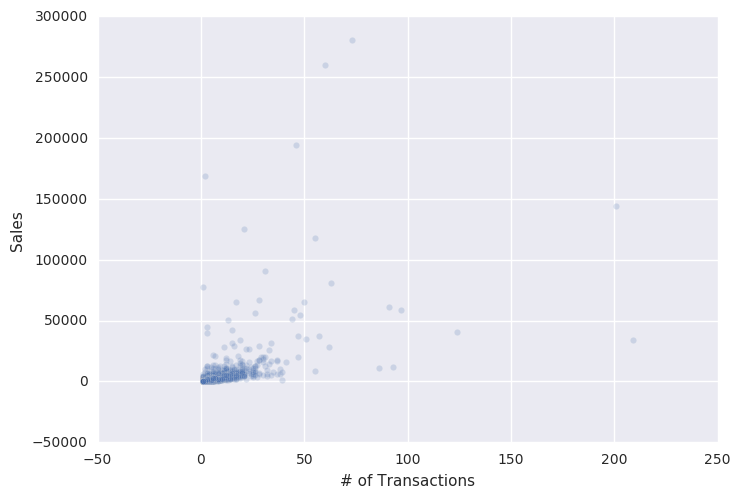

In [24]:
# Transactions per customer
# Sales per customer

# Scatter plot
df_per_customer.plot(kind='scatter', x='InvoiceCnt', y='Sales', alpha=0.2)
plt.xlabel('# of Transactions')
plt.ylabel('Sales')
plt.show()

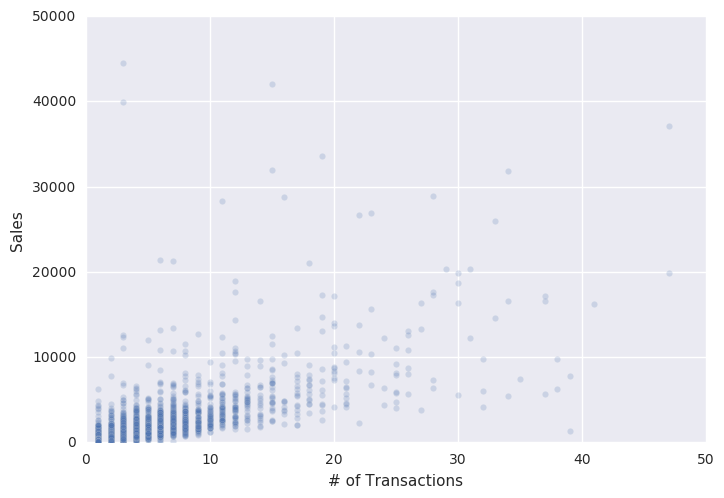

In [26]:
# Transactions per customer
# Sales per customer

# Scatter plot
df_per_customer.plot(kind='scatter', x='InvoiceCnt', y='Sales', alpha=0.2)
plt.xlim(0, 50)
plt.ylim(0, 50000)
plt.xlabel('# of Transactions')
plt.ylabel('Sales')
plt.show()